Integral aproximada = 9.568136284942158


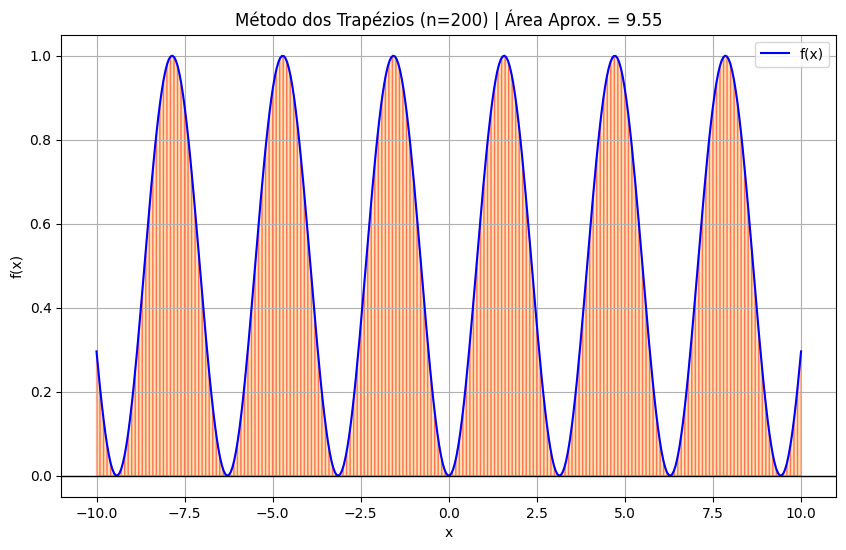

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from typing import Callable

def integral_trapézio(func:Callable[[float],float], pi:float, pf:float, n:int) -> float:
    """
    Aplica o método da Regra do Trapézio Composta para encontrar uma aproximação da integral de f(x) 
    no intervalo [pi, pf]. Para isso, o intervalo é dividido em n subintervalos de tamanho igual e em cada 
    um deles é construído um trapézio que aproximará a área sob o gráfico de f(x) naquela parte.

    Args:
        func (Callable[[float], float]): Função f(x).
        pi (float): Limite inferior do intervalo.
        pf (float): Limite superior do intervalo.
        n (int): Número de subdivisões trapezoidais.

    Returns:
        float: Aproximação da integral de f(x) = 0.

    Raises:
        TypeError: Se um dos seguintes casos ocorrer:
            - func não for uma função chamável 
            - pi e pf não forem float 
            - n não for inteiro           
    """
    if not callable(func):
        raise TypeError("'func' deve ser uma função chamável")
    if not isinstance(pi, (int, float)) or not isinstance(pf, (int, float)):
        raise TypeError("'pi' e 'pf' devem ser números (int ou float)")
    if not isinstance(n, int):
        raise TypeError("'n' deve ser um inteiro")
    h = (pf - pi) / n
    pontos = [pi + h*i for i in range(n+1)]
    
    # Cálculo da integral com regra do trapézio
    area = reduce(lambda acc, i: acc + (func(pontos[i]) + func(pontos[i+1])) * h / 2, range(n), 0)

    return area

f = lambda x: np.sin(x)**2
resultado = integral_trapézio(f, -10, 10, 50)
print(f"Integral aproximada = {resultado}")

def plot_func_trapezio(func:Callable[[float],float], pi:float, pf:float, n:int):
    '''
    Esta função cria uma visualização do gráfico de f(x) e da aproximação da sua área
    por meio da função 'integral_trapezio', sombreando as n subdivisões trapezoidais.
    
    Args:
        func (Callable[[float], float]): Função f(x).
        pi (float): Limite inferior do intervalo.
        pf (float): Limite superior do intervalo.
        n (int): Número de subdivisões trapezoidais.

    Returns:
        float: Aproximação da integral de f(x) = 0.

    Raises:
        TypeError: Se um dos seguintes casos ocorrer:
            - func não for uma função chamável 
            - pi e pf não forem float 
            - n não for inteiro
    '''
    if not callable(func):
        raise TypeError("'func' deve ser uma função chamável")
    if not isinstance(pi, (int, float)) or not isinstance(pf, (int, float)):
        raise TypeError("'pi' e 'pf' devem ser números (int ou float)")
    if not isinstance(n, int):
        raise TypeError("'n' deve ser um inteiro")
    
    h = (pf - pi) / n
    pontos = [pi + h*i for i in range(n+1)]
    area = integral_trapézio(func, pi, pf, n)
    # Gerar pontos para desenhar a curva da função
    x = np.linspace(pi, pf, 400)
    y = func(x)

    plt.figure(figsize=(10,6))
    plt.plot(x, y, 'b', label='f(x)')  # Curva da função
    plt.axhline(0, color='black', linewidth=1)

    # Desenhar trapézios
    for i in range(n):
    
        x_trap = [pontos[i], pontos[i], pontos[i+1], pontos[i+1]]
        y_trap = [0, func(pontos[i]), func(pontos[i+1]), 0]
        plt.fill(x_trap, y_trap, 'orange', alpha=0.3, edgecolor='r')

    plt.title(f"Método dos Trapézios (n={n}) | Área Aprox. = {area:.2f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_func_trapezio(f, -10, 10, 200)
    

Integral aproximada = 9.545049965404733


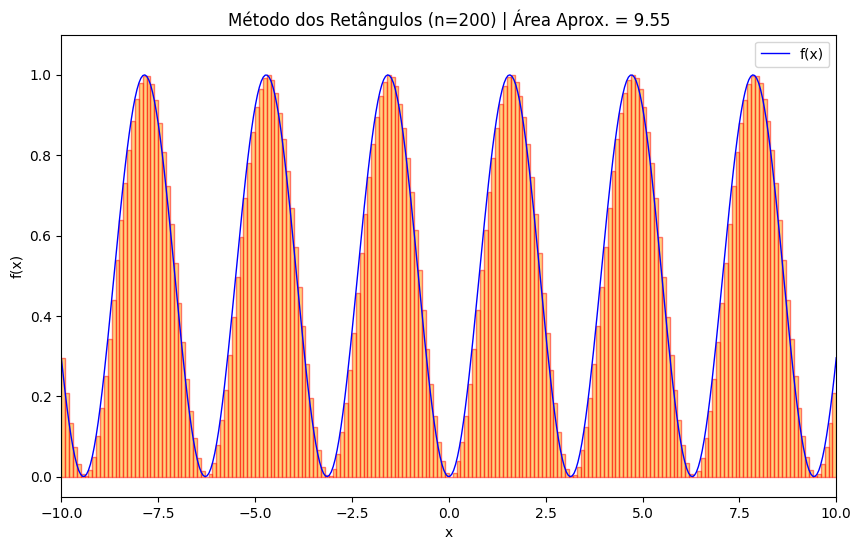

In [ ]:
from typing import Callable

def integral_retangulo(func:Callable[[float],float], a: float, b: float, n: int, ponto_corte: float=0) -> float:
    '''
    Entradas:
    f_string - expressão algébrica
    a - ponto inicial do intervalo
    b - ponto final do intervalo
    n - número de subintervalos da partição
    ponto_corte - parâmetro de altura do subintervalo, recebe:
        - 0 para Soma de Riemann pela Esquerda
        - 1 para Soma de Riemann pela Direita
        - 0.5 para Soma de Riemann pelo Centro

    Saída: Integral aproximada pela Soma de Riemann com método dos retângulos
    '''
    
    variacao = (b - a) / n  
    area = 0

    for i in range(n):
        x_inicio = a + i * variacao
        y_inicio = func(x_inicio)
        x_fim = x_inicio + variacao
        y_fim = func(x_fim)

        x_altura = x_inicio + ponto_corte * (x_fim - x_inicio)
        y_altura = func(x_altura)
       
        area_retangulo = y_altura * variacao
        area += area_retangulo
    return area


def plote_grafico(func:Callable[[float],float], a: float, b: float, n: int, ponto_corte: float) -> None:
    '''
    Entradas:
    f_string - expressão algébrica
    a - ponto inicial do intervalo
    b - ponto final do intervalo
    n - numero de subintervalos da partição
    ponto_corte - parâmetro de altura do subintervalo, recebe:
        - 0 para Soma de Riemann pela Esquerda
        - 1 para Soma de Riemann pela Direita
        - 0.5 para Soma de Riemann pelo Centro

    Saída: Gráfico de f com os retângulos da soma de Riemann
    '''

    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    variacao = (b - a) / n  

    for i in range(n):
        x_inicio = a + i * variacao
        x_fim = x_inicio + variacao

        x_altura = x_inicio + ponto_corte * (x_fim - x_inicio)
        y_altura = func(x_altura)
       
        ax.bar(x_inicio, y_altura, width = variacao, align = 'edge', \
                color = 'orange', edgecolor = 'r', alpha = 0.5)

    area = integral_retangulo(func, a, b, n, ponto_corte)

    x_curve = np.linspace(a, b, 400)
    y_curve = func(x_curve)
    ax.plot(x_curve, y_curve, color='blue', linewidth=1, label='f(x)')
   
    ax.set_title(f"Método dos Retângulos (n={n}) | Área Aprox. = {area:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend()
    ax.grid(False)
   
    min_y = min(0, np.min(y_curve))
    max_y = np.max(y_curve)
    ax.set_xlim([a, b])
    ax.set_ylim([min_y - max_y*0.05, max_y * 1.1])
   
    plt.show()

f = lambda x: np.sin(x)**2
resultado = integral_retangulo(f, -10, 10, 200, 0)
print(f"Integral aproximada = {resultado}")
plote_grafico(f, -10, 10, 200, 0)

Integral aproximada = 9.545049965404731


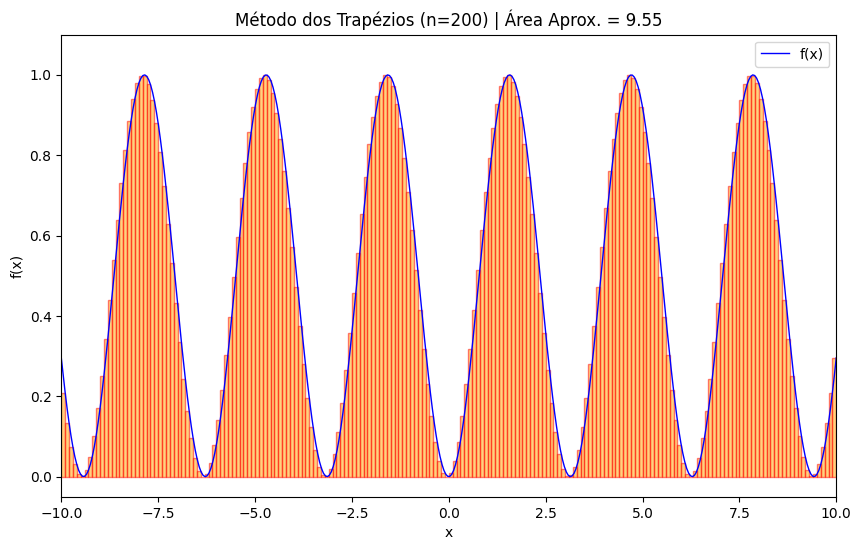

In [20]:
f = lambda x: np.sin(x)**2
resultado = integral_retangulo(f, -10, 10, 200, 1)
print(f"Integral aproximada = {resultado}")
plote_grafico(f, -10, 10, 200, 1)

Integral aproximada = 9.542765698404738


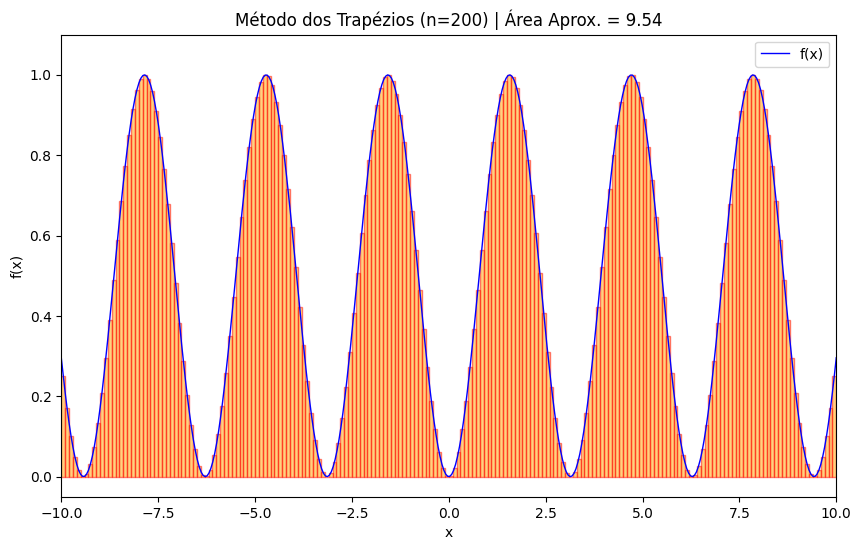

In [21]:
f = lambda x: np.sin(x)**2
resultado = integral_retangulo(f, -10, 10, 200, 0.5)
print(f"Integral aproximada = {resultado}")
plote_grafico(f, -10, 10, 200, 0.5)